In [1]:
import pandas as pd 

X = pd.read_csv('data/X_train_6ZIKlTY.csv')
y = pd.read_csv('data/y_train_lXj6X5y.csv')
X_challenge = pd.read_csv('data/X_test_oiZ2ukx.csv')

## 1. Analyse des données

In [3]:
print("Valeurs manquantes dans les données d'entrainement :")
print(X.isna().sum())

Valeurs manquantes dans les données d'entrainement :
Index                        0
patient_id                   0
cohort                       0
sexM                         0
gene                     17958
age_at_diagnosis          2830
age                          0
ledd                     20593
time_since_intake_on     25940
time_since_intake_off    43828
on                       16659
off                      23407
dtype: int64


In [4]:
print("Proportions de valeurs manquantes dans les données d'entrainement :")
print(X.isna().mean())

Proportions de valeurs manquantes dans les données d'entrainement :
Index                    0.000000
patient_id               0.000000
cohort                   0.000000
sexM                     0.000000
gene                     0.322968
age_at_diagnosis         0.050897
age                      0.000000
ledd                     0.370358
time_since_intake_on     0.466522
time_since_intake_off    0.788231
on                       0.299606
off                      0.420966
dtype: float64


In [5]:
print("Type des données")
print(X.dtypes)

Type des données
Index                      int64
patient_id                object
cohort                    object
sexM                       int64
gene                      object
age_at_diagnosis         float64
age                      float64
ledd                     float64
time_since_intake_on     float64
time_since_intake_off    float64
on                       float64
off                      float64
dtype: object


Comme mentionné dans le contexte du challenge, off et on ont beaucoup de valeurs manquantes et il faudra réfléchir à comment on comble ces valeurs. Cependant time_since_intake_xx ont aussi pas mal de valeurs manquantes notamment _off qui a quand meme 78% de valeurs manquantes donc à voir si on peut pas enlever cette feature.

Distribution des données non NaN
              Index          sexM  age_at_diagnosis           age  \
count  55603.000000  55603.000000      52773.000000  55603.000000   
mean   27801.000000      0.596353         56.734648     62.516422   
std    16051.347846      0.490633         10.823093     11.484480   
min        0.000000      0.000000         16.500000     16.500000   
25%    13900.500000      0.000000         49.500000     54.900000   
50%    27801.000000      1.000000         56.900000     62.500000   
75%    41701.500000      1.000000         64.400000     70.500000   
max    55602.000000      1.000000         89.900000    103.300000   

               ledd  time_since_intake_on  time_since_intake_off  \
count  35010.000000          29663.000000           11775.000000   
mean     638.102228              1.953717              14.199448   
std      219.443182              1.168793               2.844782   
min       50.000000              0.000000               6.900000   
25%  

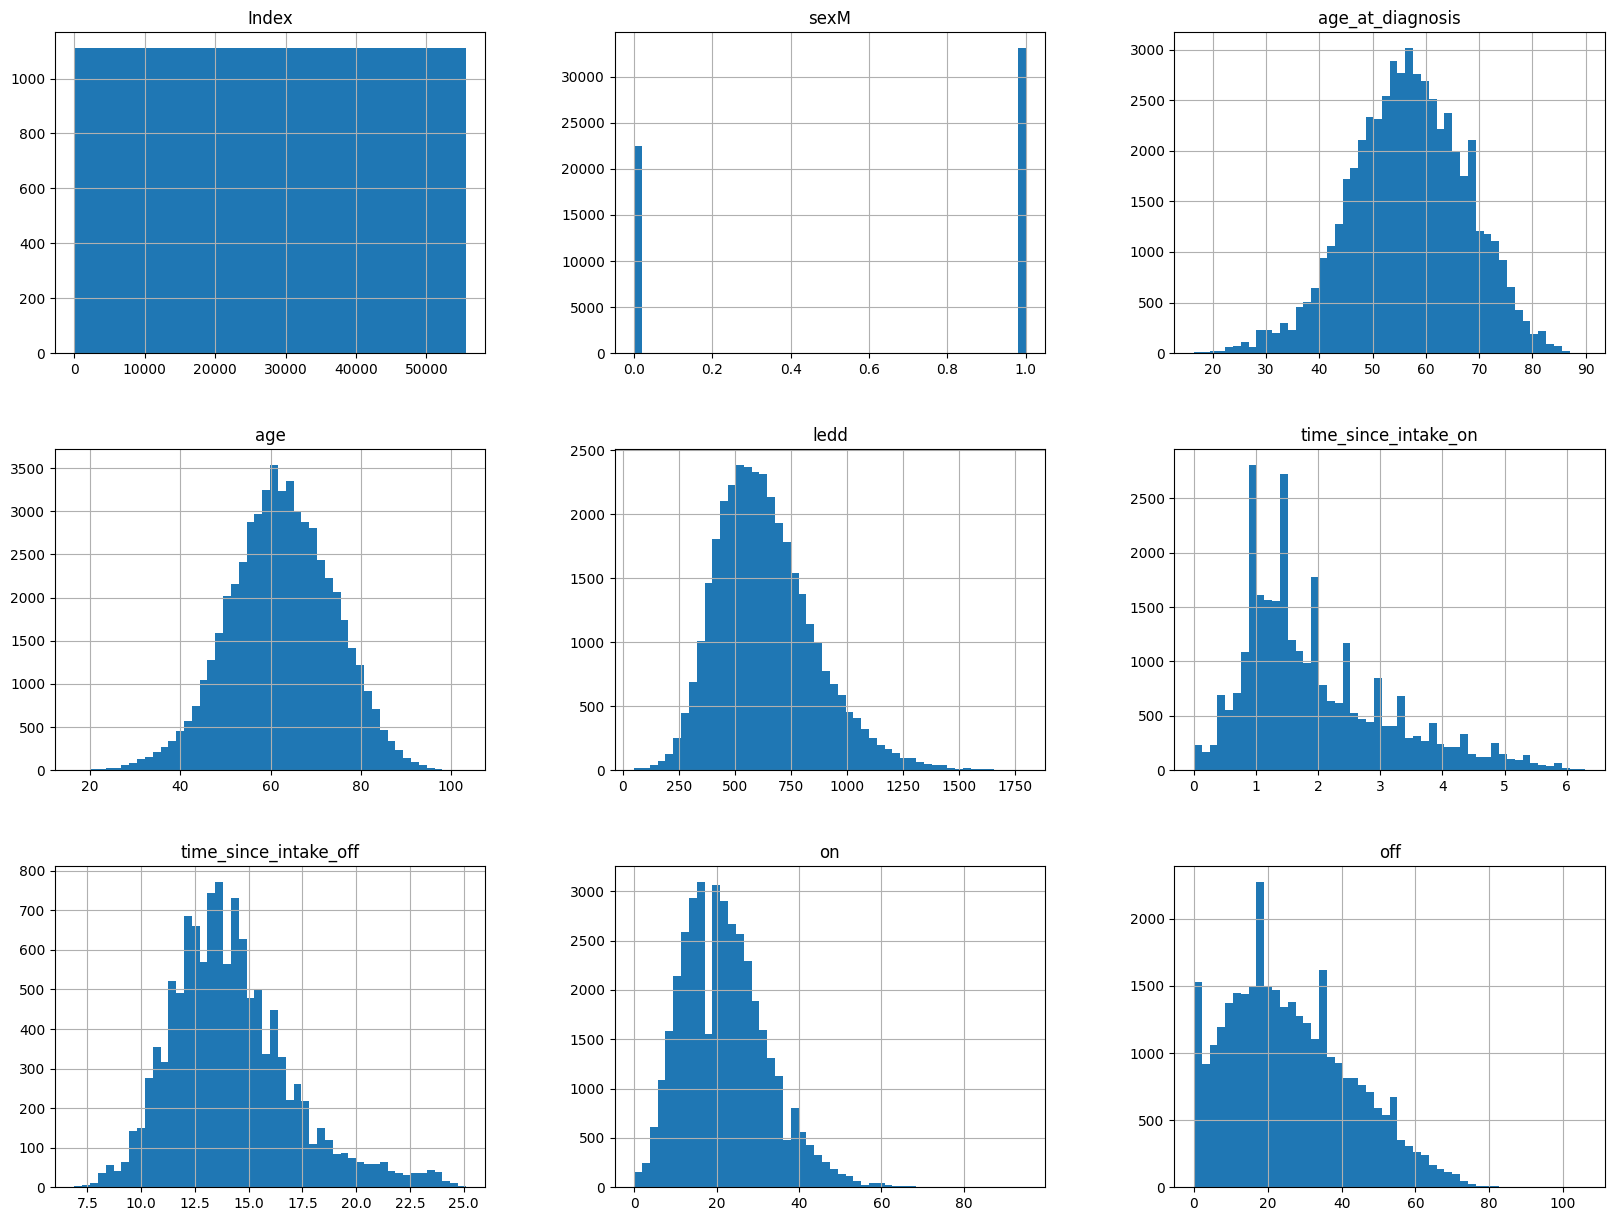

In [4]:
# distribution des données non NaN
import matplotlib.pyplot as plt
print("Distribution des données non NaN")
print(X.describe())
X.hist(bins=50, figsize=(20,15))
plt.show()



Distribution des données du challenge


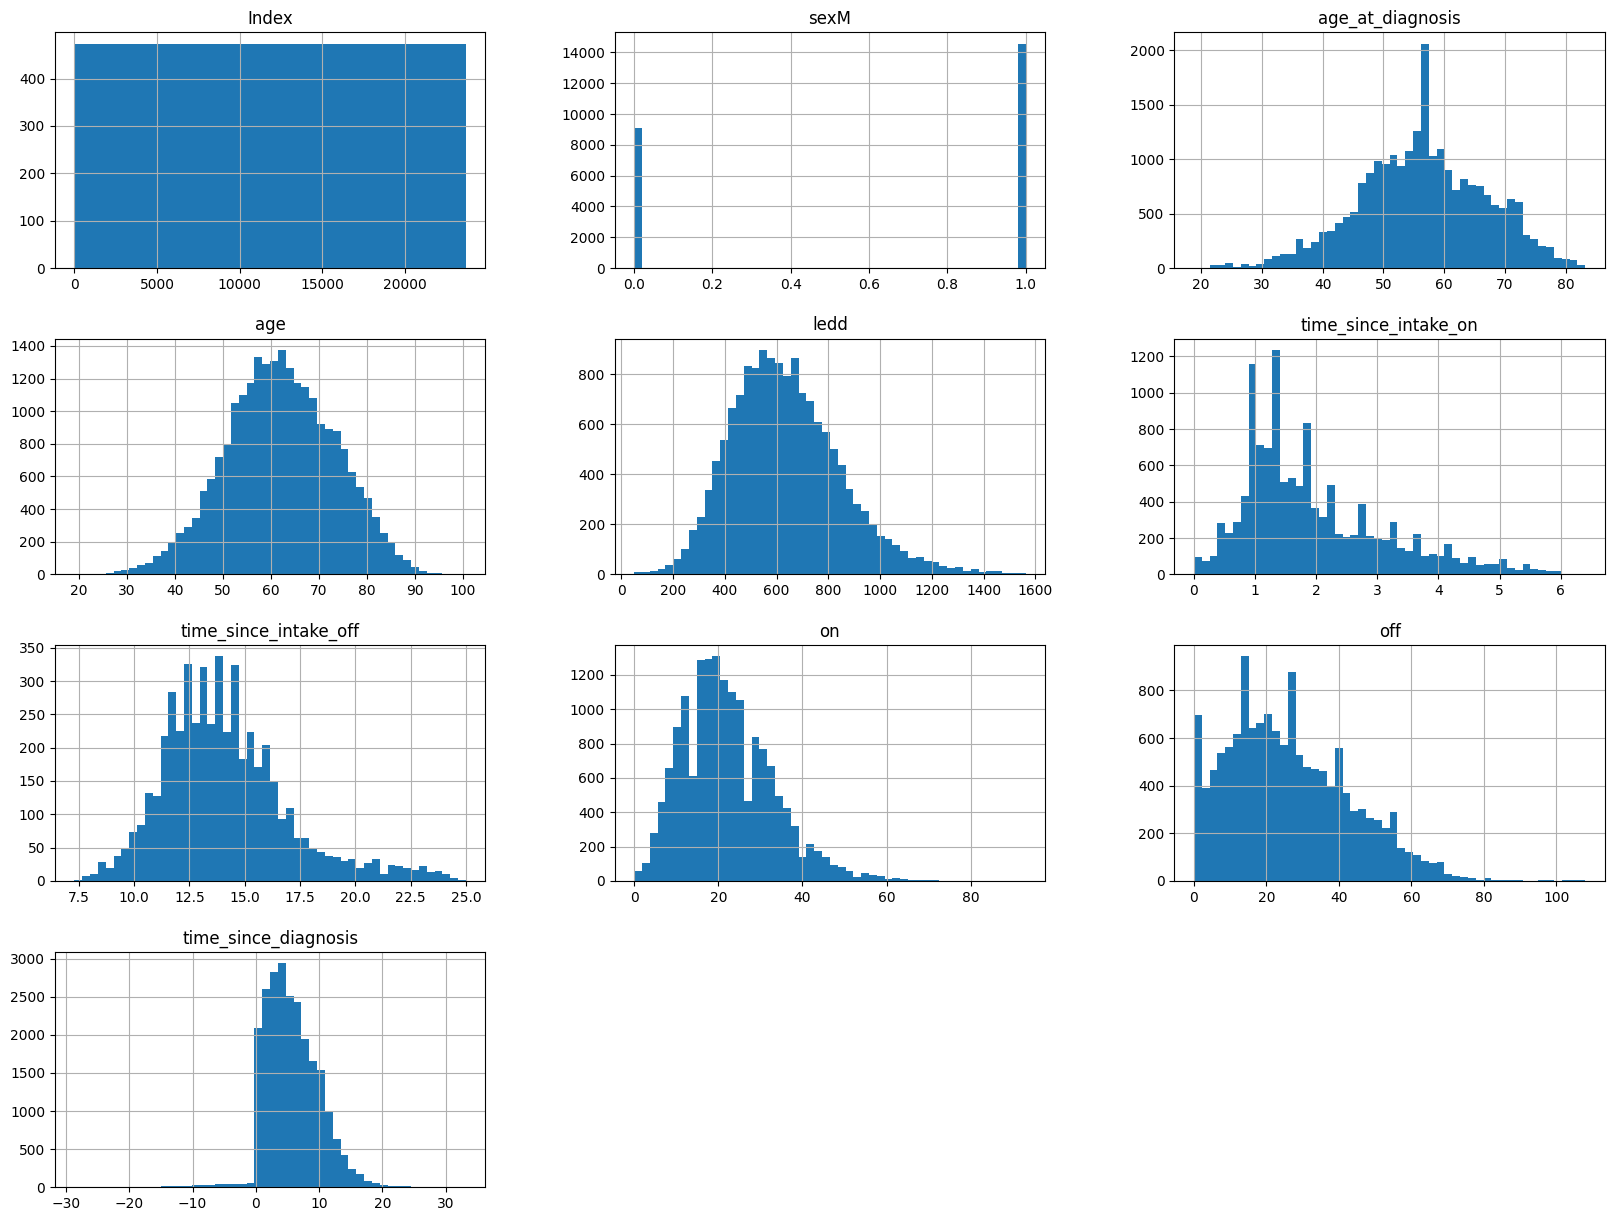

In [7]:
print("Distribution des données du challenge")
X_challenge.hist(bins=50, figsize=(20,15))
plt.show()

y a des valeurs aberrantes dans time since diagnosis de X_challenge, ca peut pas etre négatif

### Faut faire gaffe faut mettre le time since diagnosis dans X

In [8]:
X['time_since_diagnosis']=X['age']-X['age_at_diagnosis']

Avec time since diagnosis c'est mieux


array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'sexM'}>,
        <Axes: title={'center': 'age_at_diagnosis'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'ledd'}>,
        <Axes: title={'center': 'time_since_intake_on'}>],
       [<Axes: title={'center': 'time_since_intake_off'}>,
        <Axes: title={'center': 'on'}>, <Axes: title={'center': 'off'}>],
       [<Axes: title={'center': 'time_since_diagnosis'}>, <Axes: >,
        <Axes: >]], dtype=object)

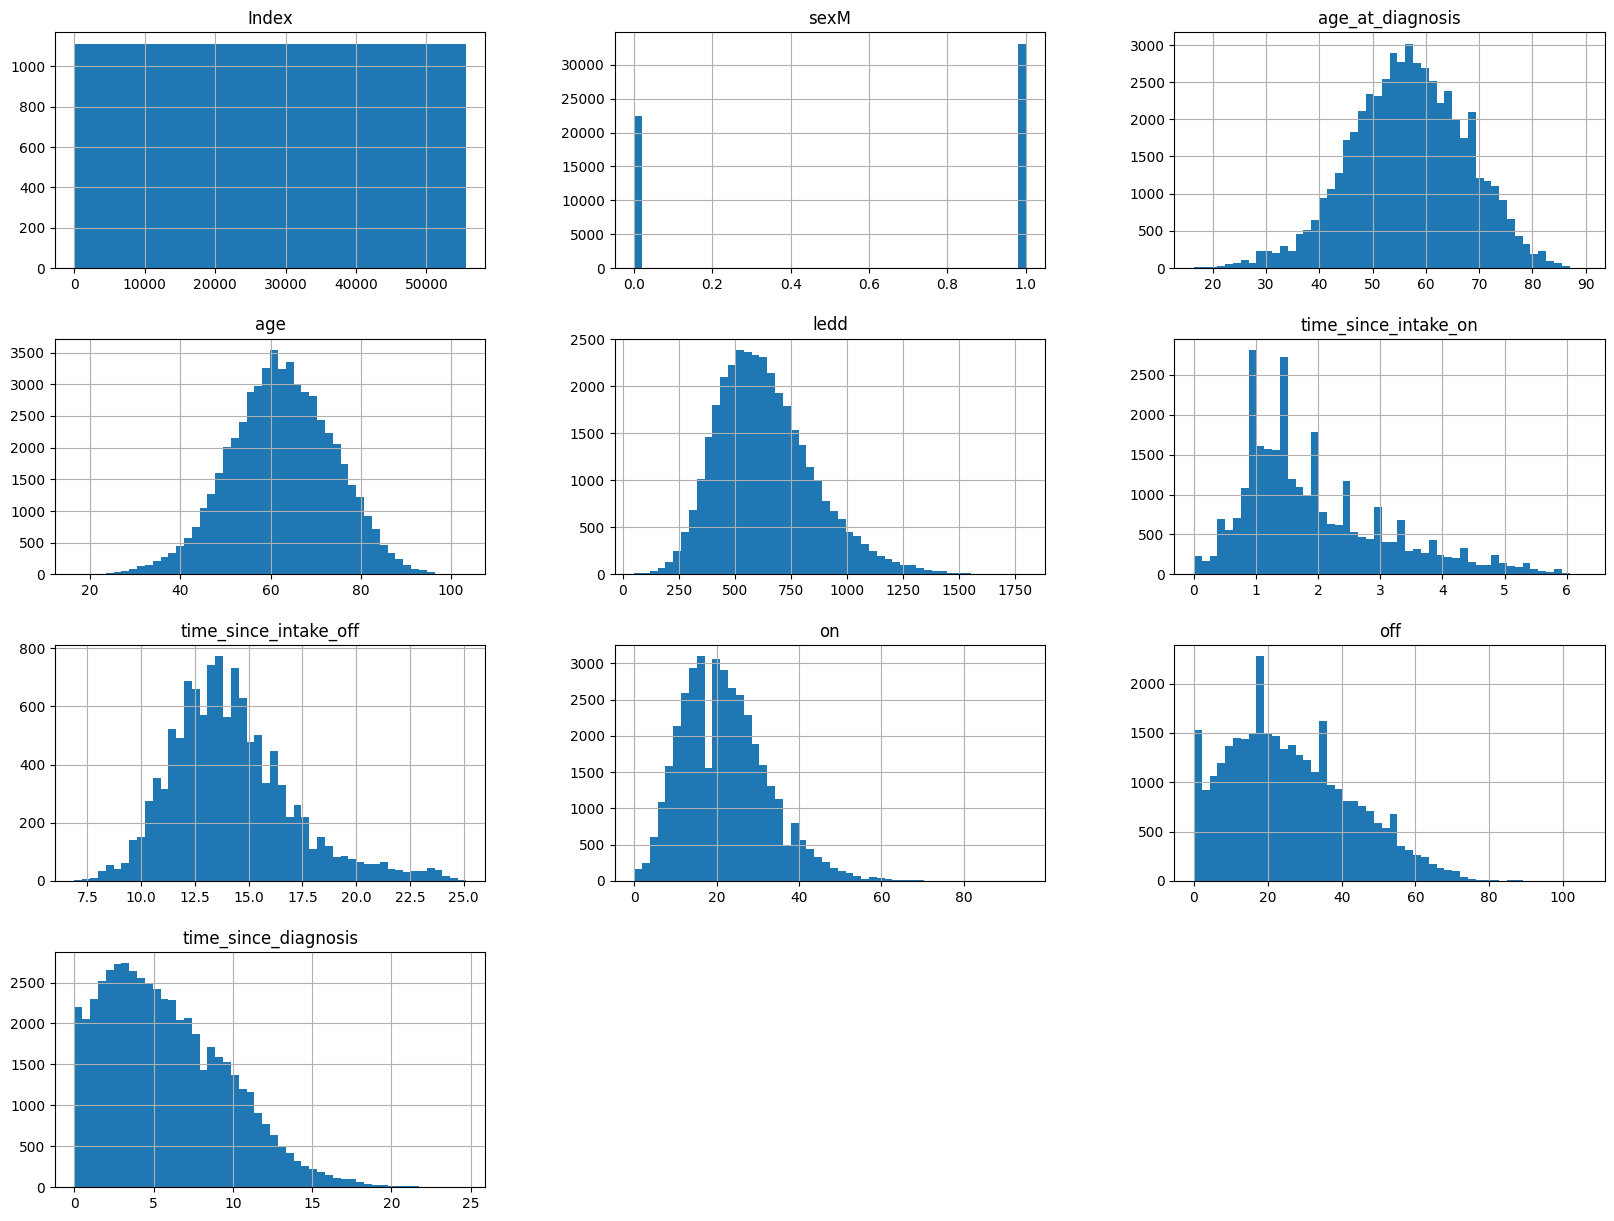

In [9]:
print("Avec time since diagnosis c'est mieux")
X.hist(bins=50, figsize=(20,15))

In [10]:
X.isna().sum()

Index                        0
patient_id                   0
cohort                       0
sexM                         0
gene                     17958
age_at_diagnosis          2830
age                          0
ledd                     20593
time_since_intake_on     25940
time_since_intake_off    43828
on                       16659
off                      23407
time_since_diagnosis      2830
dtype: int64

In [ ]:
X['gene'].value_counts()/X.shape[0]

TypeError: unsupported operand type(s) for /: 'list' and 'int'